In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Populating the interactive namespace from numpy and matplotlib


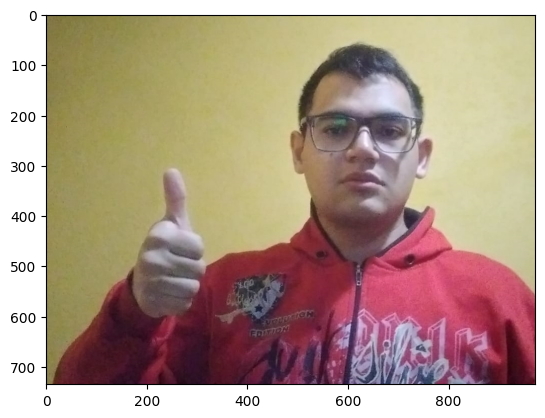

In [2]:
%pylab inline
import matplotlib.pyplot as plt
from torchvision.io import read_image
img = read_image('/content/drive/MyDrive/Proyecto-Integrador-Redes/Dataset/Letras/Imagen_LetraA4.jpg')
imgplot = plt.imshow(img.permute(1,2,0))
plt.show()

In [3]:
import torch
import torchvision.transforms as T
from torchvision.transforms import v2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torchvision import tv_tensors
import numpy as np
import pandas as pd

#Mostrar Imagen con bbox
def plot_image_with_bbox(img, bbox, title=""):
    img_np = img.permute(1, 2, 0).numpy()  # Convertir a numpy [H, W, C]
    fig, ax = plt.subplots(1)
    ax.imshow(img_np)

    # Convertir de centro, ancho, alto a coordenadas de esquina superior izquierda
    cx, cy, width, height = bbox
    x1 = cx - width / 2
    y1 = cy - height / 2

    # Crear el rectángulo con las nuevas coordenadas
    rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    plt.title(title)
    plt.axis("off")
    plt.show()

In [5]:
import torch
import pandas as pd
import json

# Cargar el archivo CSV
labels = pd.read_csv("/content/drive/MyDrive/Proyecto-Integrador-Redes/Dataset/Letras_Matias_Gonza.csv")
labels

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,Imagen_LetraA4.jpg,121613,{},1,0,"{""name"":""rect"",""x"":164,""y"":298,""width"":164,""he...","{""Label"":""A""}"
1,Imagen_LetraA5.jpg,97721,{},1,0,"{""name"":""rect"",""x"":100,""y"":415,""width"":176,""he...","{""Label"":""A""}"
2,Imagen_LetraA6.jpg,112027,{},1,0,"{""name"":""rect"",""x"":55,""y"":243,""width"":168,""hei...","{""Label"":""A""}"
3,Imagen_LetraB4.jpg,149394,{},1,0,"{""name"":""rect"",""x"":20,""y"":329,""width"":231,""hei...","{""Label"":""B""}"
4,Imagen_LetraB5.jpg,89571,{},1,0,"{""name"":""rect"",""x"":169,""y"":363,""width"":219,""he...","{""Label"":""B""}"
...,...,...,...,...,...,...,...
205,Imagen_LetraMZ5.jpg,55531,{},1,0,"{""name"":""rect"",""x"":302,""y"":381,""width"":119,""he...","{""Label"":""Z""}"
206,Imagen_LetraMC5.jpg,54406,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":53,""y"":262,""width"":127,""hei...","{""Label"":""C""}"
207,Imagen_LetraMG1.jpg,64260,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":169,""y"":159,""width"":109,""he...","{""Label"":""G""}"
208,Imagen_LetraMV1.jpg,59445,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":193,""y"":305,""width"":187,""he...","{""Label"":""V""}"


In [6]:
# Convertir la columna 'region_shape_attributes' de JSON a diccionario y extraer las coordenadas
bbox_tensors = []
for _, row in labels.iterrows():
    # Convertir la cadena JSON en un diccionario
    region_shape = json.loads(row['region_shape_attributes'])
    region_att = json.loads(row['region_attributes'])

    # Extraer las coordenadas de x, y, width y height
    letra, x, y, width, height = region_att["Label"], region_shape["x"], region_shape["y"], region_shape["width"], region_shape["height"]
    # Convertir a tensor
    bbox_tensor = [letra, torch.tensor([x+ width/2 , y+height/2 , width , height ], dtype=torch.float32)]
    bbox_tensors.append(bbox_tensor)

# Ejemplo de uso: mostrar los primeros bounding boxes como tensores
for bbox in bbox_tensors:
    print(bbox)

['A', tensor([246., 454., 164., 312.])]
['A', tensor([188., 565., 176., 300.])]
['A', tensor([139.0000, 390.5000, 168.0000, 295.0000])]
['B', tensor([135.5000, 577.5000, 231.0000, 497.0000])]
['B', tensor([278.5000, 614.5000, 219.0000, 503.0000])]
['B', tensor([541., 733., 176., 388.])]
['C', tensor([368.5000, 553.5000, 277.0000, 237.0000])]
['C', tensor([200., 559., 306., 298.])]
['C', tensor([436.5000, 618.5000, 327.0000, 273.0000])]
['D', tensor([494.5000, 691.0000, 255.0000, 324.0000])]
['D', tensor([300., 529., 270., 324.])]
['D', tensor([370.0000, 591.5000, 280.0000, 327.0000])]
['E', tensor([572.0000, 435.5000, 302.0000, 223.0000])]
['E', tensor([591.0000, 444.5000, 298.0000, 191.0000])]
['E', tensor([514., 462., 288., 198.])]
['F', tensor([744.5000, 785.5000, 467.0000, 291.0000])]
['F', tensor([750.0000, 817.5000, 550.0000, 255.0000])]
['F', tensor([744.5000, 735.5000, 417.0000, 363.0000])]
['G', tensor([460.5000, 552.0000, 201.0000, 298.0000])]
['G', tensor([448., 593., 212., 

In [17]:
A_bbox = bbox_tensors[0][1]

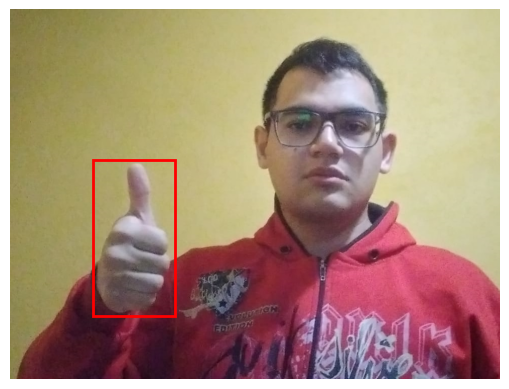

In [18]:
plot_image_with_bbox(img, A_bbox)

BoundingBoxes([[246., 454., 164., 312.]], format=BoundingBoxFormat.CXCYWH, canvas_size=(735, 973))
tensor([167.7254, 289.1925, 101.3731, 213.5863])


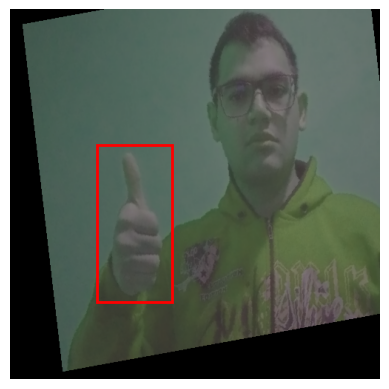

In [22]:
transform = v2.Compose([
    v2.Resize(size=(500,500)),
    v2.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
    v2.RandomAffine(degrees=15, translate=(0.15, 0.15), scale=(0.9,1.1), shear=5),
    v2.RandomPerspective(distortion_scale=0.15, p=0.5)
])
#Creo el bounding box
bb_A = tv_tensors.BoundingBoxes(A_bbox, format="CXCYWH", canvas_size=(img.shape[1], img.shape[2]))
#se transforman la imagen y el box juntos
aug_img, aug_A = transform(img, bb_A)
#Squeeze para que sea un arreglo y poder graficarlo, BoundingBoxes agrega una dimension (tal vez espera múltiples boxes)
aug_A = aug_A.squeeze(0)

print(bb_A)
print(aug_A)

plot_image_with_bbox(aug_img, aug_A)
